### Predict topic

The data is grouped into predefined classes (topics), so only classification models are used.

In [65]:
import pandas as pd
data = pd.read_csv('ml_data.csv')
data

,text,topic,topic_id
0,dallaglio man controversy lawrence dallaglio a...,sport,0
1,best person legal job best person job appoint ...,politics,1
2,viewers able tv edit watch just favourite bits...,tech,2
3,fox attack blair tory tony blair take uk war e...,politics,1
4,microsoft debut security tool microsoft releas...,tech,2
...,...,...,...
2113,rapper cent protege rapper cent public protege...,entertainment,4
2114,michael film singer michael film life start pu...,entertainment,4
2115,ray charles studio museum museum dedicate care...,entertainment,4
2116,chancellor labour voters gordon brown issue te...,politics,1


We split the data into three sets: train, validation, and test.
- A training set that the model will be trained on.
- A validation set used for finding the optimal parameters.
- A test set to evaluate the model’s performance.

In [66]:
from sklearn.model_selection import train_test_split

texts = data['text'] 
labels = data['topic']

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)
len(X_train_split), len(X_test),len(X_val_split), len(y_train_split), len(y_test),len(y_val_split)



(1355, 424, 339, 1355, 424, 339)

Converting text data into numerical features using the TF-IDF (Term Frequency-Inverse Document Frequency) method.

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(data.text).toarray()
#Convert training and validation data.
X_train_tfidf = tfidf.fit_transform(X_train_split) 
X_val_tfidf = tfidf.transform(X_val_split) 
print(X_train_tfidf.shape)
print(X_val_tfidf.shape)


(1355, 4694)
(339, 4694)


We train and validate on 4 models.
- Logistic Regression: A linear classifier, mostly similar to traditional linear regression, but fitting the output of the logistic function.
- (Multinomial) Naive Bayes: A Bayesian model, assuming total independence between features. In our case, this means assuming that P("football") is unrelated to P("stadium"), which of course is a terrible assumption... and yet, this model still works surprisingly well with Bag of Words model, and were notably used for spam detection.
- Random Forest: Random Forest (as the name might suggest) is the ensembling of a large number of decision trees, each trained on a random subset of the input features. They work well when complex feature-relations are involved, and are relatively robust to overfitting. 
- Support Vector Classifier (SVC): SVC is a classification model that finds the optimal hyperplane to separate data points of different classes. It works well for both linear and non-linear problems, using kernel functions (e.g., RBF) for non-linear cases. SVC is effective in high-dimensional spaces and is robust to overfitting, but can be computationally expensive for large datasets.

Logistic Regression

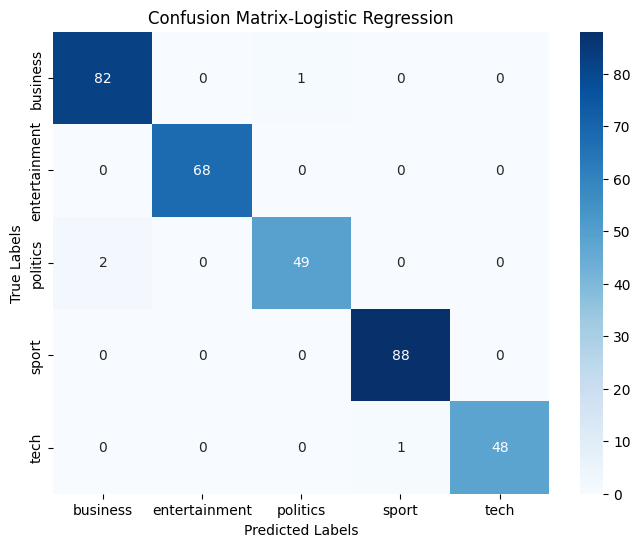

Logistic Regression Classifier:
                precision    recall  f1-score   support

     business       0.98      0.99      0.98        83
entertainment       1.00      1.00      1.00        68
     politics       0.98      0.96      0.97        51
        sport       0.99      1.00      0.99        88
         tech       1.00      0.98      0.99        49

     accuracy                           0.99       339
    macro avg       0.99      0.99      0.99       339
 weighted avg       0.99      0.99      0.99       339



In [68]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
#Step 1: Initialize and train the model.
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train_split)
#Step 2: Make predictions on the validation set
y_pred = model.predict(X_val_tfidf)

#Step 3: Evaluate the results
conf_matrix = confusion_matrix(y_val_split, y_pred)

#Draw the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix-Logistic Regression')
plt.show()
print("Logistic Regression Classifier:\n",classification_report(y_val_split, y_pred))



Random Forest

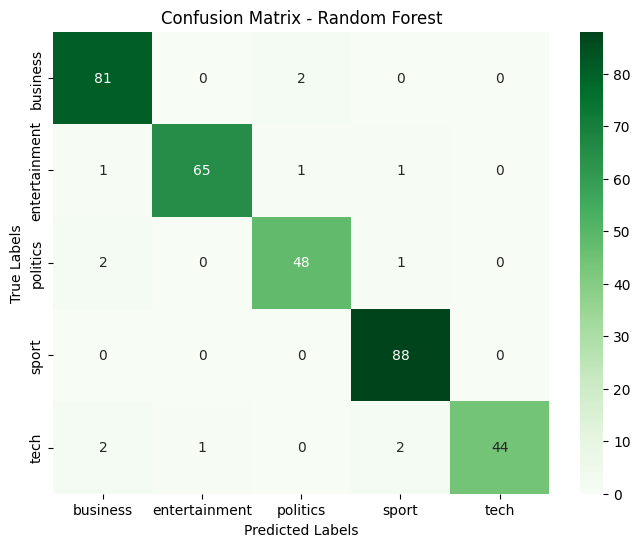

Random Forest Classifier:
                precision    recall  f1-score   support

     business       0.94      0.98      0.96        83
entertainment       0.98      0.96      0.97        68
     politics       0.94      0.94      0.94        51
        sport       0.96      1.00      0.98        88
         tech       1.00      0.90      0.95        49

     accuracy                           0.96       339
    macro avg       0.96      0.95      0.96       339
 weighted avg       0.96      0.96      0.96       339



In [69]:
from sklearn.ensemble import RandomForestClassifier

#Step 1: Initialize and train the model.
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_tfidf, y_train_split)

#Step 2: Make predictions on the validation set
y_pred_rf = rf_clf.predict(X_val_tfidf)

#Step 3: Evaluate the results
conf_matrix_rf = confusion_matrix(y_val_split, y_pred_rf)
#Draw the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()
print("Random Forest Classifier:\n", classification_report(y_val_split, y_pred_rf))


Naive Bayes

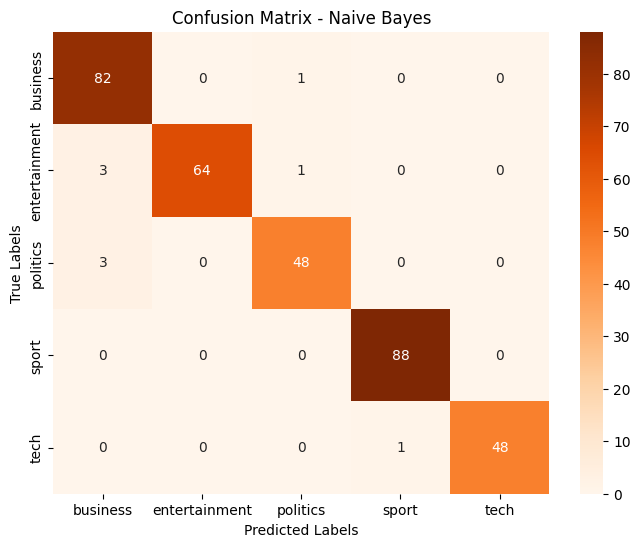

Naive Bayes Classifier:
                precision    recall  f1-score   support

     business       0.93      0.99      0.96        83
entertainment       1.00      0.94      0.97        68
     politics       0.96      0.94      0.95        51
        sport       0.99      1.00      0.99        88
         tech       1.00      0.98      0.99        49

     accuracy                           0.97       339
    macro avg       0.98      0.97      0.97       339
 weighted avg       0.97      0.97      0.97       339



In [70]:
from sklearn.naive_bayes import MultinomialNB

#Step 1: Initialize and train the model.
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tfidf, y_train_split)

#Step 2: Make predictions on the validation set
y_pred_nb = nb_clf.predict(X_val_tfidf)

#Step 3: Evaluate the results
conf_matrix_nb = confusion_matrix(y_val_split, y_pred_nb)

#Draw the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Oranges', xticklabels=nb_clf.classes_, yticklabels=nb_clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()
print("Naive Bayes Classifier:\n", classification_report(y_val_split, y_pred_nb))


SVC

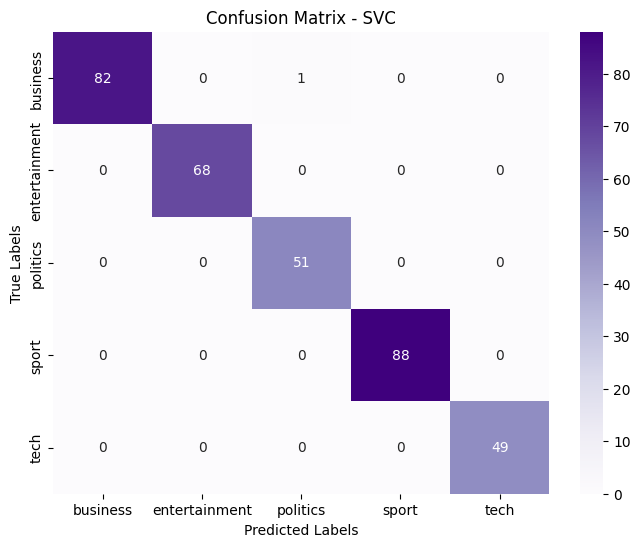

SVC Classification Report:
               precision    recall  f1-score   support

     business       1.00      0.99      0.99        83
entertainment       1.00      1.00      1.00        68
     politics       0.98      1.00      0.99        51
        sport       1.00      1.00      1.00        88
         tech       1.00      1.00      1.00        49

     accuracy                           1.00       339
    macro avg       1.00      1.00      1.00       339
 weighted avg       1.00      1.00      1.00       339



In [71]:
from sklearn.svm import SVC

#Step 1: Initialize and train the model.
svc_clf = SVC(kernel='linear', random_state=42)
svc_clf.fit(X_train_tfidf, y_train_split)

#Step 2: Make predictions on the validation set
y_pred_svc = svc_clf.predict(X_val_tfidf)

#Step 3: Evaluate the results
conf_matrix_svc = confusion_matrix(y_val_split, y_pred_svc)

#Draw the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Purples', xticklabels=svc_clf.classes_, yticklabels=svc_clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVC')
plt.show()
print("SVC Classification Report:")
print(classification_report(y_val_split, y_pred_svc))


RESULT

Logistic Regression:  
- Accuracy: 99%  
- Key Metrics: This model performs very well, with high accuracy and strong F1 scores across all classes.  
- Best Results: The entertainment class has a recall of 1.00, and other classes also have high recall (close to 1.00).  
- Classification Ability: The model performs excellently in classifying topics such as business, sport, and tech with high accuracy and F1 scores.  

Random Forest:  
- Accuracy: 96%  
- Key Metrics: The Random Forest model shows relatively high accuracy, though slightly lower than Logistic Regression. The sport and entertainment classes maintain very good recall and F1 scores.  
- Best Results: The sport and entertainment classes have a recall of 1.00, indicating the model's strong performance in these topics.  
- Classification Ability: Random Forest performs well in classifying most classes, with stable precision and recall metrics, although slightly lower than Logistic Regression.  

Naive Bayes:  
- Accuracy: 97%  
- Key Metrics: Naive Bayes achieves slightly higher accuracy compared to Random Forest. It has high recall and precision, particularly for the sport class with a recall of 1.00.  
- Best Results: Like Logistic Regression, Naive Bayes performs excellently in the sport class, with both recall and F1 at 1.00.  
- Classification Ability: Naive Bayes has very high accuracy in classifying entertainment and sport, and also performs well for other classes like business and tech, although slightly lower than other models.  

SVC Classification:  
- Accuracy: 100%  
- Key Metrics: The SVC model demonstrates excellent performance, achieving the highest overall accuracy among all models. Its precision, recall, and F1-scores across all classes are consistently high.  
- Best Results:  
    * The entertainment, tech, and sport classes have perfect recall (1.00), highlighting the model's exceptional ability to classify these topics without any false negatives.  
    * The business class also achieves outstanding performance with a recall of 0.99 and an F1-score of 0.99.  
- Classification Ability: The model is highly reliable, with robust performance across all topics. Slightly lower recall for politics (0.98) still indicates excellent classification capability.   

Choose the best model, which is SVC, to make predictions on the test set

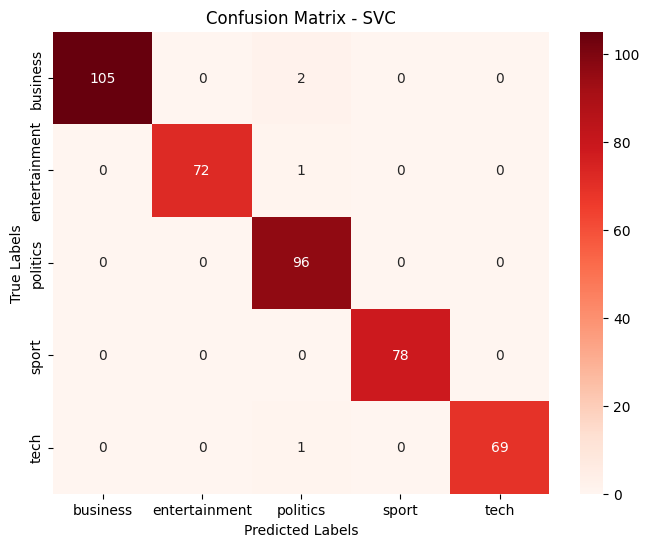

        Actual Predicted
1565     sport     sport
1100     sport     sport
1329     sport     sport
1261      tech      tech
637   business  business
...        ...       ...
581   politics  politics
2083     sport     sport
351   business  business
1815  business  business
1651  business  business

[424 rows x 2 columns]
SVC Classification Report:
               precision    recall  f1-score   support

     business       1.00      0.98      0.99       107
entertainment       1.00      0.99      0.99        73
     politics       0.96      1.00      0.98        96
        sport       1.00      1.00      1.00        78
         tech       1.00      0.99      0.99        70

     accuracy                           0.99       424
    macro avg       0.99      0.99      0.99       424
 weighted avg       0.99      0.99      0.99       424



In [72]:
X_train_tfidf = tfidf.fit_transform(X_train)  
X_test_tfidf = tfidf.transform(X_test) 
#Step 1: Initialize and train the model.
svc_clf = SVC(kernel='linear', random_state=42)
svc_clf.fit(X_train_tfidf, y_train)

#Step 2: Make predictions on the test set
y_pred_svc = svc_clf.predict(X_test_tfidf)

#Step 3: Evaluate the results
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

#Draw the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Reds', xticklabels=svc_clf.classes_, yticklabels=svc_clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVC')
plt.show()

#Create a DataFrame to hold the results.
svc_pred_df = pd.DataFrame()
svc_pred_df["Actual"] = y_test
svc_pred_df["Predicted"] = y_pred_svc

print(svc_pred_df)
print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))

RESULT:

- Accuracy:
On the test set, the accuracy reached 99%, which is slightly lower than the validation set (100%). Although there is a minor difference, the model maintains excellent performance.

- Key Metrics:
On the test set, precision, recall, and F1-scores remain high across all classes, similar to the validation set. Slight variations are observed in some classes, such as "business" and "politics"
- Best Results:

    * The "entertainment," "sport," and "tech" classes maintained outstanding performance with nearly perfect precision and recall on both sets (test and validation).
    * "Sport" achieved a recall and F1-score of 1.00 on both sets.
- Classification Ability:
The SVC model consistently performs well across all topics on both sets, with only minor variations in a few classes. This stable performance indicates that the model is neither overfitting nor underfitting, ensuring consistent results between the validation and test sets.